In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/

Mounted at /content/drive
'Colab Notebooks'   Dataset   Kontak   labels.txt   Model  'Model CNN'	'Model CNN.ipynb'   Projek


In [ ]:
pip install tensorflow keras matplotlib numpy

Found 1306 images belonging to 4 classes.
Found 328 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - accuracy: 0.5692 - loss: 1.1362 - val_accuracy: 1.0000 - val_loss: 0.0794
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.9973 - loss: 0.1041 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 -

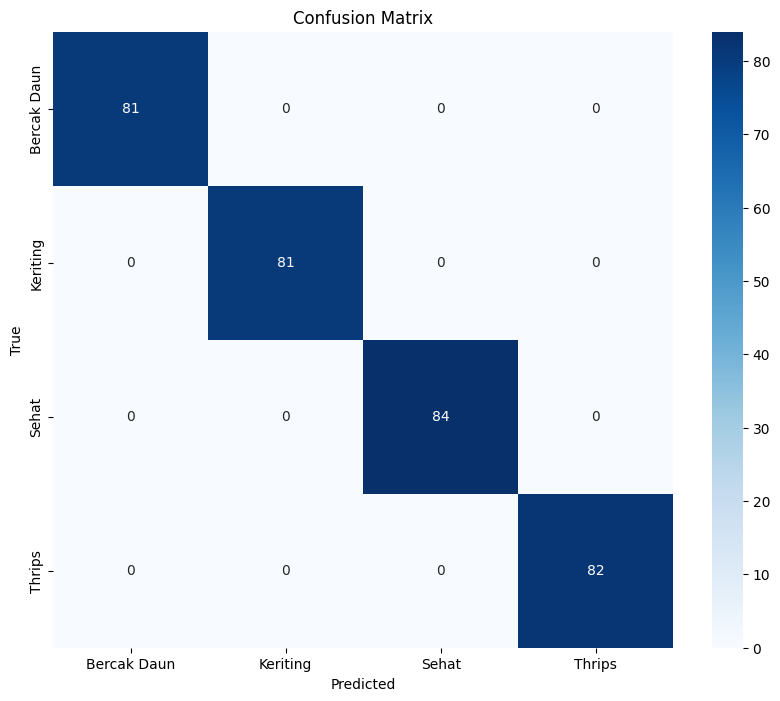

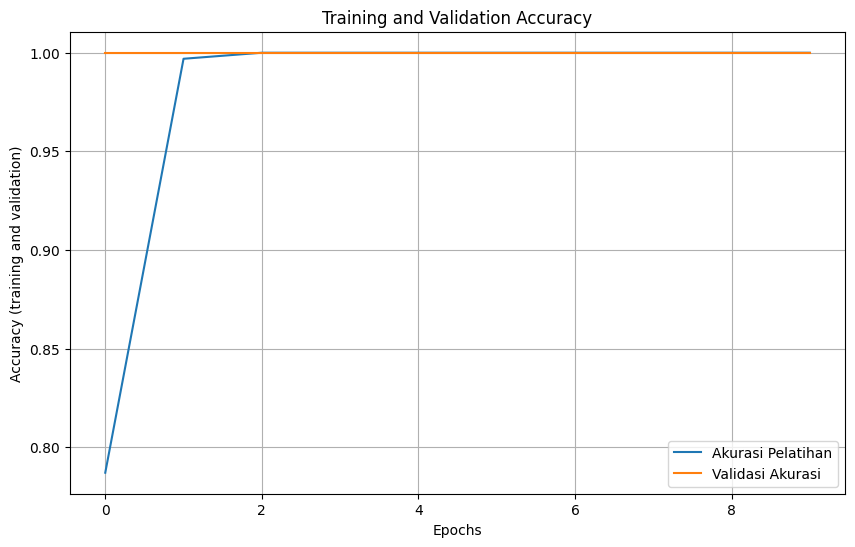

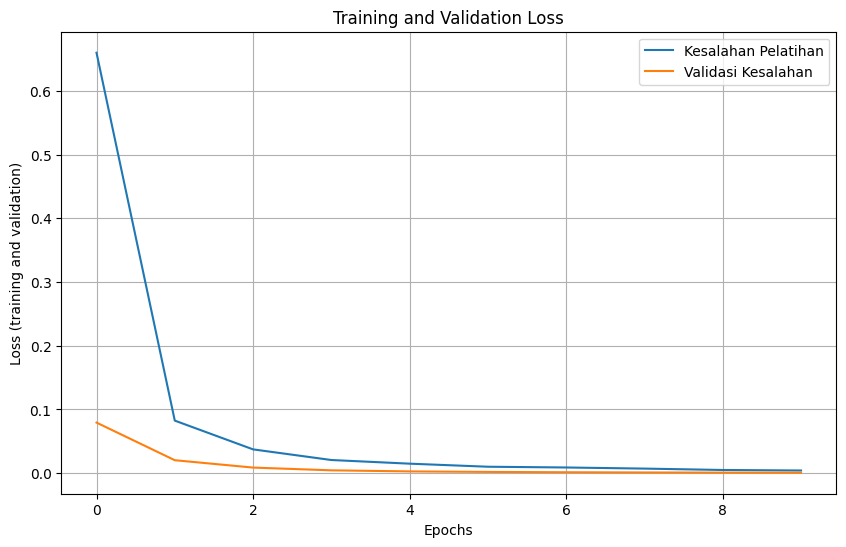

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
Total waktu deteksi: 1698.25 ms
Rata-rata waktu deteksi per gambar: 5.18 ms


Results saved at /content/drive/MyDrive/Model CNN Final/evaluation_results.txt
Model saved at /content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili.h5
Saved artifact at '/tmp/tmpjznv0hqq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_474')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137664879541520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408405008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408404240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664879540752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408404048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408405392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408406736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137664408406928: TensorSpec(shape=(), dtype=tf.resource, name=None

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import os

# Path dataset
train_dir = '/content/drive/MyDrive/Dataset/Dataset Cabai Keriting/train'
test_dir = '/content/drive/MyDrive/Dataset/Dataset Cabai Keriting/test'

# Parameters
img_size = 224
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data Normalization
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load MobileNetV2 with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Evaluate the model
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

# Classification Report and Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Validasi Akurasi')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (training and validation)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Kesalahan Pelatihan')
plt.plot(history.history['val_loss'], label='Validasi Kesalahan')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (training and validation)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Calculate prediction speed
start_time = time.time()
predictions = model.predict(test_generator)
end_time = time.time()

# Average prediction time per image
total_images = len(test_generator.filenames)
total_time = (end_time - start_time) * 1000  # Convert to milliseconds
avg_time_per_image = total_time / total_images

print(f"Total waktu deteksi: {total_time:.2f} ms")
print(f"Rata-rata waktu deteksi per gambar: {avg_time_per_image:.2f} ms")

# Save evaluation results to file
results_path = '/content/drive/MyDrive/Model CNN Final/evaluation_results.txt'
with open(results_path, 'w') as f:
    f.write(f"Test Accuracy: {eval_result[1] * 100:.2f}%\n")
    f.write(f"Average Detection Time: {avg_time_per_image:.2f} ms\n")
print(f"Results saved at {results_path}")

# Save model
saved_model_path = '/content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili.h5'
model.save(saved_model_path)
print(f"Model saved at {saved_model_path}")

# Convert to TFLite
tflite_model_path = '/content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved at {tflite_model_path}")

In [ ]:
!pip install tflite-support

In [ ]:
!pip uninstall tflite-support -y

Found existing installation: tflite-support 0.4.4
Uninstalling tflite-support-0.4.4:
  Successfully uninstalled tflite-support-0.4.4


In [2]:
!pip install tflite-support

In [5]:
from tflite_support.metadata_writers import writer_utils
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import metadata_info

# Path model TFLite
model_path = '/content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili.tflite'

# Path model TFLite dengan metadata
model_with_metadata_path = '/content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili_with_metadata.tflite'

# Path untuk menyimpan file metadata (.json)
metadata_json_path = '/content/drive/MyDrive/Model CNN Final/metadata.json'

# Path ke file labels.txt
label_file_path = '/content/drive/MyDrive/Model CNN Final/labels.txt'

# Detail input
input_norm_mean = 127.5
input_norm_std = 127.5

# Buat MetadataWriter untuk ImageClassifier
writer = image_classifier.MetadataWriter.create_for_inference(
    model_buffer=writer_utils.load_file(model_path),  # Muat file TFLite
    input_norm_mean=[input_norm_mean],
    input_norm_std=[input_norm_std],
    label_file_paths=[label_file_path]
)

# Tambahkan metadata
metadata_with_model = writer.populate()

# Simpan model TFLite dengan metadata
writer_utils.save_file(metadata_with_model, model_with_metadata_path)

# Simpan file JSON metadata
with open(metadata_json_path, 'w') as f:
    f.write(writer.get_metadata_json())

print(f"Metadata added. Model saved at {model_with_metadata_path}")
print(f"Metadata JSON saved at {metadata_json_path}")


Metadata added. Model saved at /content/drive/MyDrive/Model CNN Final/MobileNetV2_Chili_with_metadata.tflite
Metadata JSON saved at /content/drive/MyDrive/Model CNN Final/metadata.json
